# Assignment 2 Feature Extraction
### Name: Tanmay Walke
### Date: 27 Jan 2025
### Class: TY-CSE(AI)
### Roll No.: 65

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
#checking for null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
# Split the dataset into training and testing sets (80:20)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

#train and test split so not to include indexes of each row
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)

In [10]:
# Displaying head and tail of  testing dataset
print("Training Set - Head:")
print(train_df.head())
print("\nTraining Set - Tail:")
print(train_df.tail())

# Display head and tail of  testing dataset
print("\nTesting Set - Head:")
print(test_df.head())
print("\nTesting Set - Tail:")
print(test_df.tail())

Training Set - Head:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
46   7525000  6000         3          2        4      yes        no       no   
93   6300000  7200         3          2        1      yes        no      yes   
335  3920000  3816         2          1        1      yes        no      yes   
412  3430000  2610         3          1        2      yes        no      yes   
471  3010000  3750         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
46               no             yes        1       no        furnished  
93               no             yes        3       no   semi-furnished  
335              no             yes        2       no        furnished  
412              no              no        0      yes      unfurnished  
471              no              no        0       no      unfurnished  

Training Set - Tail:
       price  area  bedrooms  bathroom

# Visualization

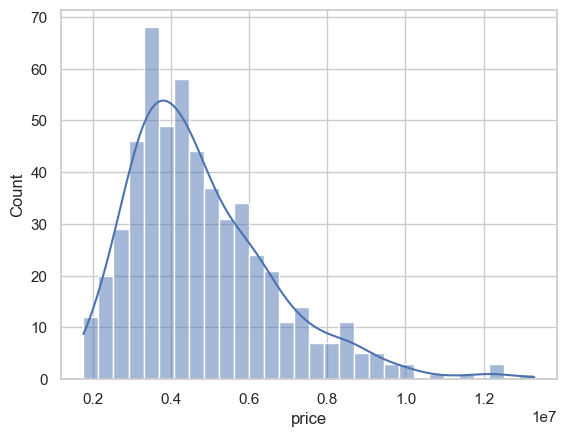

In [60]:
sns.histplot(df['price'], bins=30,kde=True)
plt.show()

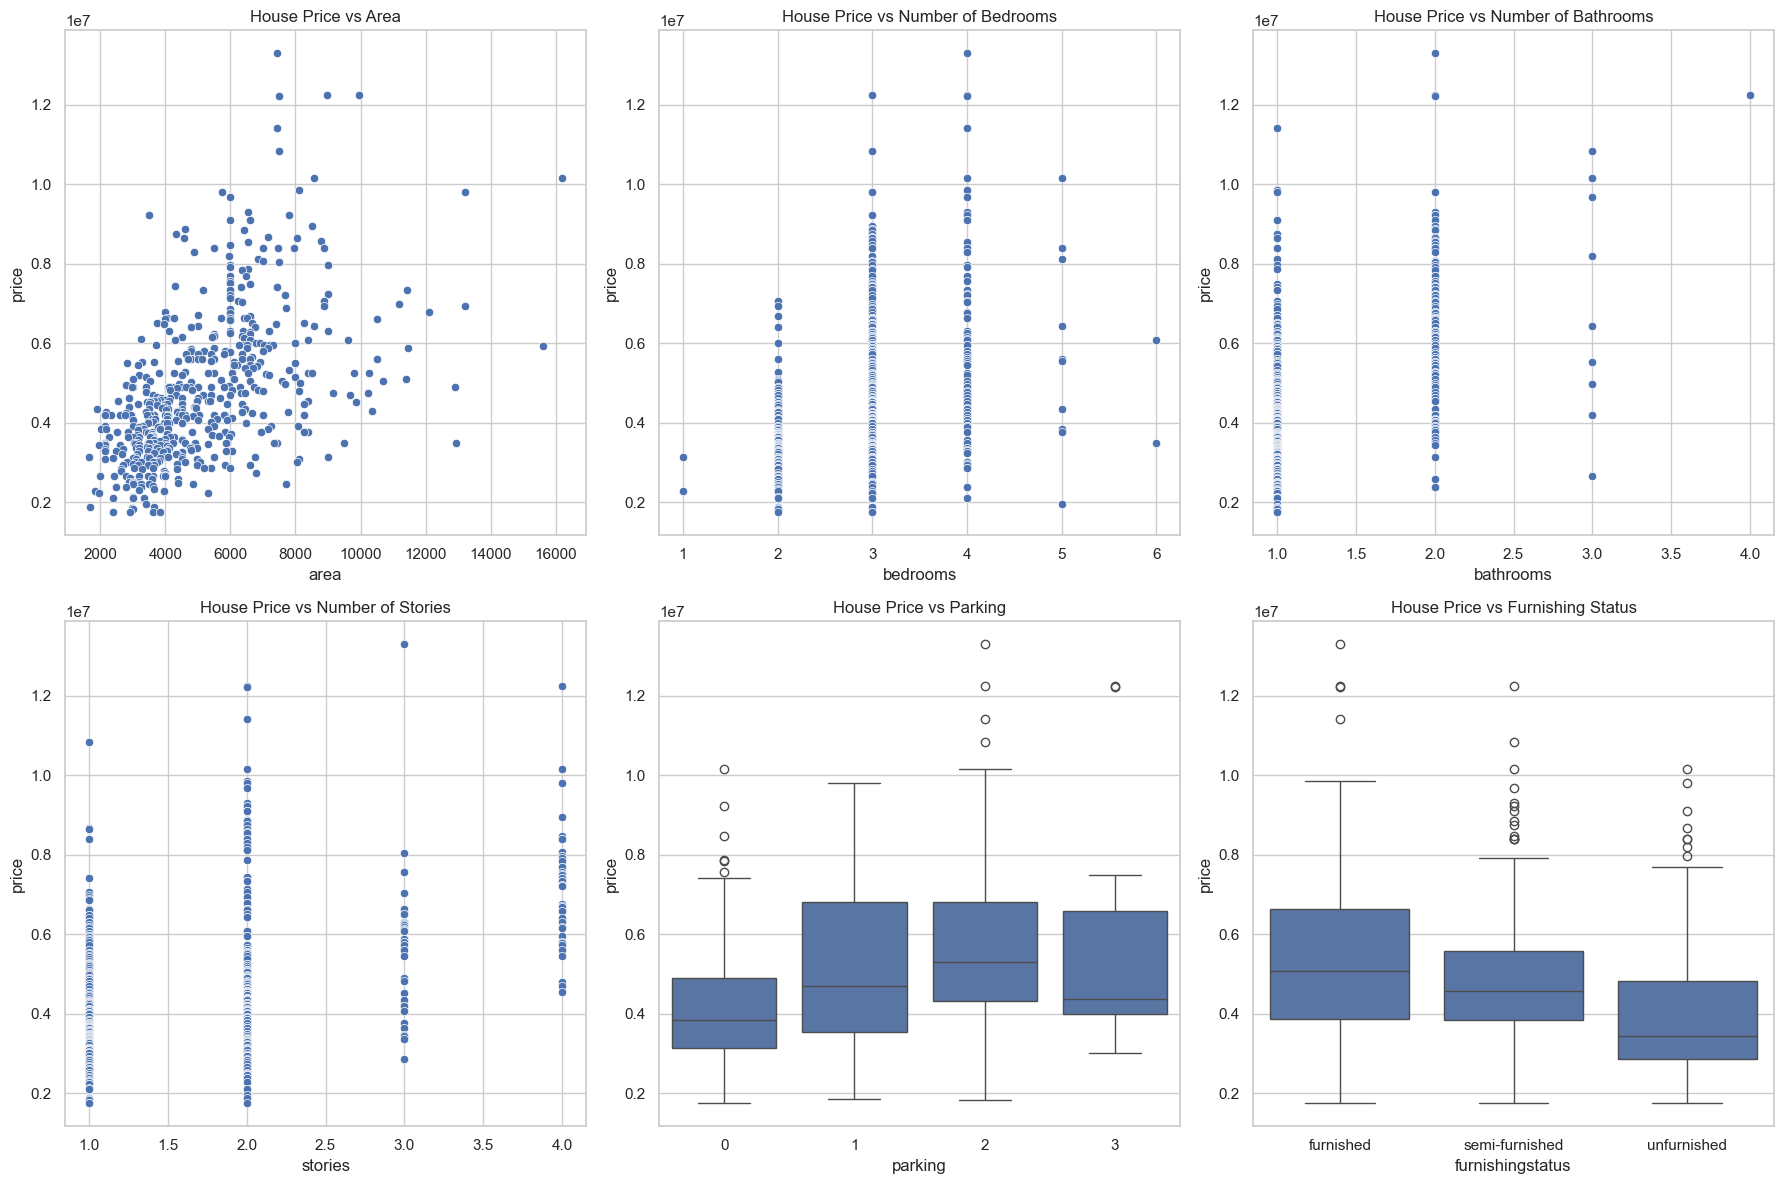

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots for each feature
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Flatten the axes array to easily iterate
axes = axes.flatten()

# Plot House Price vs Area (Area corresponds to Square_Footage)
sns.scatterplot(x=df['area'], y=df['price'], ax=axes[0])
axes[0].set_title('House Price vs Area')

# Plot House Price vs Number of Bedrooms
sns.scatterplot(x=df['bedrooms'], y=df['price'], ax=axes[1])
axes[1].set_title('House Price vs Number of Bedrooms')

# Plot House Price vs Number of Bathrooms
sns.scatterplot(x=df['bathrooms'], y=df['price'], ax=axes[2])
axes[2].set_title('House Price vs Number of Bathrooms')

# Plot House Price vs Number of Stories
sns.scatterplot(x=df['stories'], y=df['price'], ax=axes[3])
axes[3].set_title('House Price vs Number of Stories')

# Plot House Price vs Parking (binary feature, 0 or 1)
sns.boxplot(x=df['parking'], y=df['price'], ax=axes[4])
axes[4].set_title('House Price vs Parking')

# Plot House Price vs Furnishing Status (categorical feature)
sns.boxplot(x=df['furnishingstatus'], y=df['price'], ax=axes[5])
axes[5].set_title('House Price vs Furnishing Status')

plt.tight_layout()
plt.show()


In [11]:
#independent variables
x = df.drop(['price'], axis=1)

In [12]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [13]:
#target variable
y = df['price']

In [14]:
# Define categorical columns that need to be one-hot encoded
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

In [15]:
encoder = OneHotEncoder(drop='first', sparse_output=False) 

# Fit and transform the categorical columns
encoded_cols = encoder.fit_transform(x[categorical_cols])

# Convert the result to a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

X_encoded = x.drop(columns=categorical_cols).reset_index(drop=True)  # Drop original categorical columns
X_encoded = pd.concat([X_encoded, encoded_df], axis=1)  # Concatenate the encoded columns


In [16]:
print(X_encoded.dtypes)

area                                 int64
bedrooms                             int64
bathrooms                            int64
stories                              int64
parking                              int64
mainroad_yes                       float64
guestroom_yes                      float64
basement_yes                       float64
hotwaterheating_yes                float64
airconditioning_yes                float64
prefarea_yes                       float64
furnishingstatus_semi-furnished    float64
furnishingstatus_unfurnished       float64
dtype: object


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [18]:
linear_reg = LinearRegression()

In [19]:
linear_reg.fit(X_train,y_train)


LinearRegression()

In [20]:
#predicting the test data
pred = linear_reg.predict(X_test)

In [21]:
#evaluating performance of model
mse=mean_absolute_error(y_test, pred)
print(mse)

970043.4039201637


In [22]:
rmse = np.sqrt(mse)

# Print RMSE
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 984.9078149350647


In [23]:
#r squared score to evaluate performance (coefficient of determination), close to 1 is perfect model
r2_score(y_test, pred)

0.6529242642153184

## Regression predicted vs actual datapoints plot

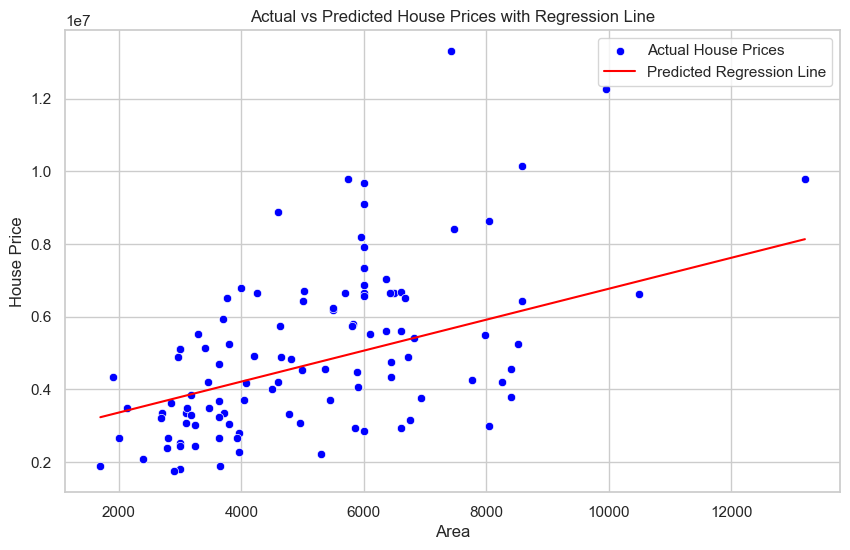

In [75]:

y = df['price']
X = df[['area']]  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()


linear_reg.fit(X_train, y_train)

pred = linear_reg.predict(X_test)

plt.figure(figsize=(10, 6))


sns.scatterplot(x=X_test['area'], y=y_test, color='blue', label='Actual House Prices')


sns.lineplot(x=X_test['area'], y=pred, color='red', label='Predicted Regression Line')

plt.xlabel('Area')
plt.ylabel('House Price')
plt.title('Actual vs Predicted House Prices with Regression Line')
plt.legend()

plt.show()


## Feature Extraction(PCA in Dimensionality Reduction):-

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler    

In [25]:
# Select numerical columns for PCA (drop non-numerical ones)
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories']
X = df[numerical_cols]

In [ ]:
# Step 1: Pre-process the data through standardization
scaler = StandardScaler()   
X_scaled = scaler.fit_transform(X)

In [27]:
# Step 2: Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

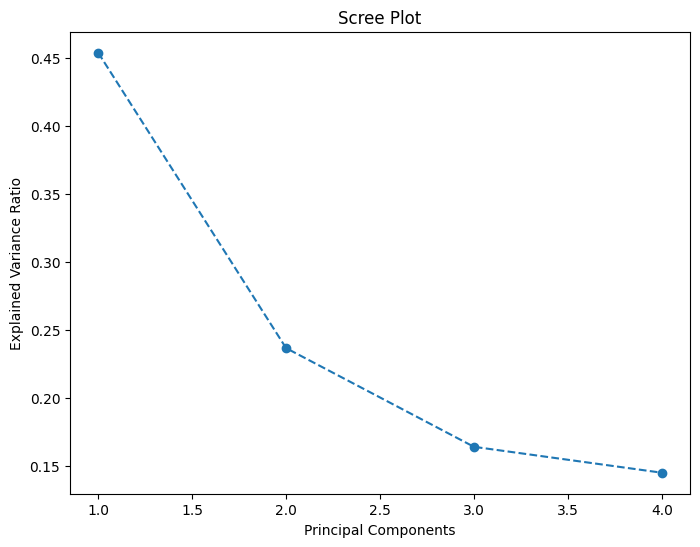

In [28]:
# Step 3: Construct the scree plot:plot the eigen values 
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(numerical_cols) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()
#The point where the curve flattens out indicates the optimal number of components to retain 

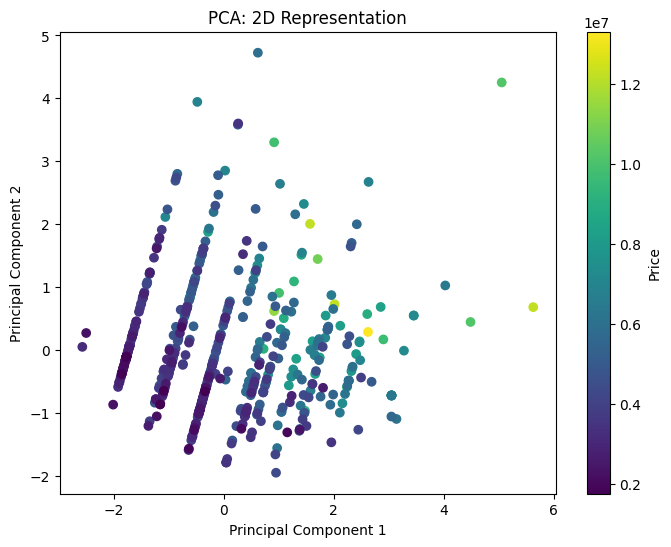

In [29]:
# Step 4: Data visualization in lower-dimensional representation (2D or 3D)
# Visualize in 2D (first two principal components)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['price'], cmap='viridis')
plt.colorbar(label='Price')
plt.title('PCA: 2D Representation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


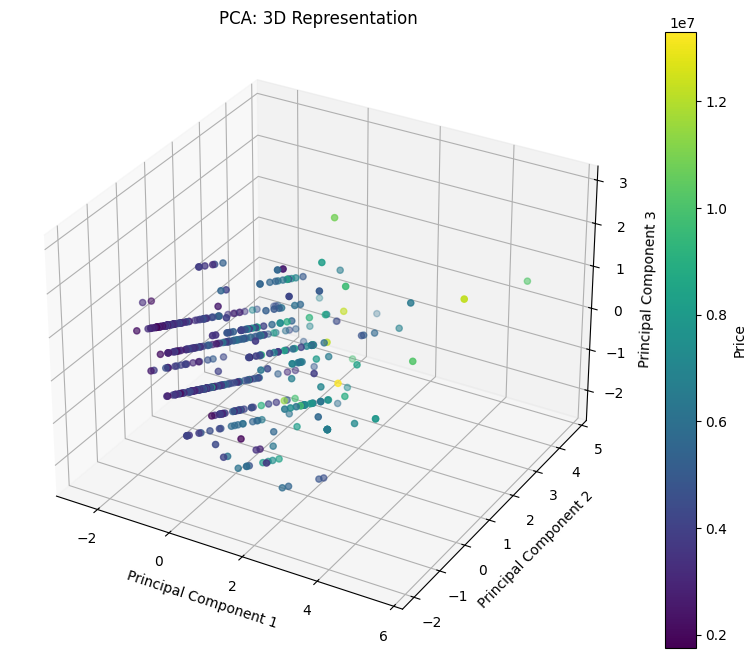

In [30]:
# Optionally, visualize in 3D (first three principal components)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['price'], cmap='viridis')
fig.colorbar(scatter, label='Price')
ax.set_title('PCA: 3D Representation')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.5137585349037065
Mean Squared Error: 2457741642022.09
